# Analisis de Datos con Python


In [1]:
#Importar Librerias Python 
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Pandas es un paquete de Python que se ocupa principalmente de:

- **Series** (matriz homogénea 1d)
- **DataFrame** (matriz heterogénea etiquetada 2d)
- **Panel** (matriz 3d general)

### Pandas Series

Pandas *Series* es una matriz etiquetada unidimensional que contiene datos del mismo tipo (enteros, cadenas, números de coma flotante, objetos de Python, etc.)Las etiquetas de los ejes a menudo se denominan * index *.

In [2]:
# Ejemplo de crear series en Pandas :
s1 = pd.Series( [-3,-1,1,3,5] )
print(s1)

0   -3
1   -1
2    1
3    3
4    5
dtype: int64


No pasamos ningún índice, por lo que, por defecto, asignó los índices que van desde 0 a len (datos) -1

In [3]:
# Ver valores de índice
print(s1.index)

RangeIndex(start=0, stop=5, step=1)


In [4]:
# Crear series de pandas con índice:
s2 = pd.Series( np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'] )
print(s2)

a    1.516484
b   -2.338967
c   -0.908723
d   -1.320928
e   -1.052469
dtype: float64


In [5]:
# Ver valores de índice
print(s2.index)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [6]:
# Crear una serie del diccionario
data = {'pi': 3.1415, 'e': 2.71828}  # dictionary
print(data)
s3 = pd.Series ( data )
print(s3)

{'pi': 3.1415, 'e': 2.71828}
pi    3.14150
e     2.71828
dtype: float64


In [7]:
# reordenando los elementos
s4 = pd.Series ( data, index = ['e', 'pi', 'tau'])
print(s4)

e      2.71828
pi     3.14150
tau        NaN
dtype: float64


NAN (non a number) - se utiliza para especificar valores perdidos en Pandas.

In [8]:
s1[:2] # Primeros dos elementos


0   -3
1   -1
dtype: int64

In [9]:
print( s1[ [2,1,0]])  # Elementos sin orden

2    1
1   -1
0   -3
dtype: int64


In [10]:
# Series can be used as ndarray:
print("Median:" , s4.median())

Median: 2.9298900000000003


In [11]:
s1[s1 > 0]

2    1
3    3
4    5
dtype: int64

In [12]:
#  las funciones numpy se pueden usar en series como de costumbre:
s4[s4 > s4.median()]

pi    3.1415
dtype: float64

#### Atributos y métodos populares:

|  Atributo/Metodo | Descripcion |
|-----|-----|
| dtype |  tipo de datos de los valores de la serie |
| empty | Verdadero si la serie está vacía |
| size | número de elementos |
| values |Devuelve valores como ndarray |
| head() | Primeros n elementos |
| tail() | Últimos n elementos |



*Ejercicio* 

In [0]:
# Cree una serie de su elección y explore
mys = pd.Series( np.random.randn(21))
print(mys)

In [14]:
mys.head()

0   -2.249584
1   -0.374183
2    0.057489
3   -0.093044
4   -1.927267
dtype: float64

In [15]:
mys.empty

False

###  DataFrame Pandas

Pandas *DataFrame* es una estructura de datos tabular bidimensional, de tamaño variable y heterogénea con filas y columnas etiquetadas (ejes). Se puede pensar en un contenedor tipo diccionario para almacenar objetos de la serie python.

In [16]:
d =  pd.DataFrame({ 'Nombre': pd.Series(['Juan','Ana','Maria']), 
                  'Edad': pd.Series([ 21,25,23]) } )
print(d)

  Nombre  Edad
0   Juan    21
1    Ana    25
2  Maria    23


In [0]:
d2 = pd.DataFrame(np.array([['Juan','Ana','Maria'],[ 21,25,23]]).T, columns=['Nombre','Edad'])

In [23]:
d2

,Nombre,Edad
0,Juan,21
1,Ana,25
2,Maria,23


In [25]:
#Add a new column:
d['Altura'] = pd.Series([5.2,6.0,5.6])
d

,Nombre,Edad,height,Altura
0,Juan,21,5.2,5.2
1,Ana,25,6.0,6.0
2,Maria,23,5.6,5.6


In [99]:
from google.colab import files
uploaded = files.upload()

Saving Salaries.csv to Salaries (1).csv


In [0]:
#Leer archivo csv
#df = pd.read_csv("http://domain.com/examples/python/data_analysis/Salaries.csv")

import io
df = pd.read_csv(io.BytesIO(uploaded['Salaries.csv']))

In [33]:
#Mostrar las primeras 10 lineas
df.head(10)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
...,...,...,...,...,...,...
63,Prof,A,29,27,Female,91000
64,AssocProf,A,26,24,Female,73300
65,Prof,A,36,19,Female,117555
66,AsstProf,A,7,6,Female,63100


---
*Exercise* 

In [0]:
#Mostrar las primeras 10 filas
# <tu codigo va aqui>

In [0]:
#Mostrar las primeras 10 filas
# <tu codigo va aqui>

In [0]:
#Mostrar las ultimas 10 filas
# <tu codigo va aqui>

---

In [34]:
#Identificar el tipo de objeto
type(df)

pandas.core.frame.DataFrame

In [35]:
#verifica el tipo de la columna "salary"
df['salary'].dtype

dtype('int64')

In [36]:
#Lista los tipos de todas las columnas
df.dtypes

rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object

In [37]:
#Lista los nombres de columnas
df.columns

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')

In [38]:
#Enumere las etiquetas de las filas y los nombres de las columnas.
df.axes

[RangeIndex(start=0, stop=78, step=1),
 Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')]

In [39]:
#Numero de dimensiones
df.ndim

2

In [0]:
#Número total de elementos en el marco de datos
df.size

In [0]:
#Numeros de filas y columnas
df.shape

In [40]:
#Salida de estadísticas básicas para las columnas numéricas
df.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [0]:
#Calcular la media para todas las columnas numéricas
df.mean()

---
*Exercise* 

In [0]:
#Calcula la desviacion estandar (metodo std() ) para todas las columnas numericas
df.std()

---
### División y agrupación de datos

In [0]:
#Extraer una columna por nombre 
df['sex'].head()

---
*Exercise* 

In [45]:
#Calcule las estadísticas básicas para la columna de salario (método describe () utilizado)
df['sex'].describe()

count         78
unique         2
top       Female
freq          39
Name: sex, dtype: object

In [48]:
#Calcule cuántos valores en la columna de salario (use el método count ())
df['salary'].count()

78

In [50]:
#Calcule el salario promedio
df['salary'].mean()

108023.78205128205

---

In [0]:
#Agrupar datos usando el rango
df_rank = df.groupby('rank')
df_rank.head()

In [56]:
#Calcular la media de todas las columnas numéricas para el objeto agrupado
df_rank.mean()

,phd,service,salary
rank,,,
AssocProf,15.076923,11.307692,91786.230769
AsstProf,5.052632,2.210526,81362.789474
Prof,27.065217,21.413043,123624.804348


In [55]:
df.groupby('sex').mean()
df

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954


In [57]:
#Calcule el salario promedio para hombres y mujeres.  (corchetes individuales alrededor del salario)
df.groupby('sex')['salary'].mean()

sex
Female    101002.410256
Male      115045.153846
Name: salary, dtype: float64

In [58]:
#Si usamos paréntesis dobles, Pandas producirá un DataFrame
df.groupby('sex')[['salary']].mean()

,salary
sex,
Female,101002.410256
Male,115045.153846


In [0]:
# Grupo usando 2 variables - sex y rank:
df.groupby(['rank','sex'], sort=True)[['salary']].mean()

---
### Filtrado

In [77]:
#Seleccione observación con el valor en la columna de salario> 120K
df_sub = df[ df['salary'] > 120000]
df_sub.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
3,Prof,A,40,31,Male,131205
5,Prof,A,20,20,Male,122400
7,Prof,A,18,18,Male,126300
10,Prof,B,39,33,Male,128250


In [0]:
df_sub.axes

In [61]:
#Seleccionar datos para profesoras de genero femenino
df_w = df[ df['sex'] == 'Female']
df_w.head()

,rank,discipline,phd,service,sex,salary
39,Prof,B,18,18,Female,129000
40,Prof,A,39,36,Female,137000
41,AssocProf,A,13,8,Female,74830
42,AsstProf,B,4,2,Female,80225
43,AsstProf,B,5,0,Female,77000


---
*Ejercicio* 

In [63]:
# Usando el filtrado, encuentre el valor medio del salario para la disciplina A
df[ df['discipline'] =='A'].mean().round(2)
df[ df['discipline'] =='A'].mean().round(2)['salary']

98331.11

---
### Más sobre cortar el conjunto de datos

In [0]:
#Selecciona la columna salary
df1 = df['salary']

In [69]:
#Revisa el tipo del dataframe resultante
type(df1)

pandas.core.series.Series

In [72]:
#Mira los primeros elementos de la salida
df1.head()

0    186960
1     93000
2    110515
3    131205
4    104800
Name: salary, dtype: int64

In [0]:
#Seleccione el salario de la columna y haga que la salida sea un marco de datos
df2 = df[['salary']]

In [74]:
#Verifique el tipo
type(df2)

pandas.core.frame.DataFrame

In [66]:
#Seleccione un subconjunto de filas (según su posición):

df[0:10]

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


In [75]:
#Si queremos seleccionar tanto filas como columnas, podemos usar el método .loc
df.loc[10:20,['rank', 'sex','salary']]

,rank,sex,salary
10,Prof,Male,128250
11,Prof,Male,134778
12,AsstProf,Male,88000
13,Prof,Male,162200
14,Prof,Male,153750
15,Prof,Male,150480
16,AsstProf,Male,75044
17,AsstProf,Male,92000
18,Prof,Male,107300
19,Prof,Male,150500


In [0]:
df_sub.head(15)

In [76]:
#Veamos qué obtenemos para nuestro marco de datos df_sub
# Método .loc subconjunto el marco de datos basado en las etiquetas:
df_sub.loc[10:20,['rank','sex','salary']]

,rank,sex,salary
10,Prof,Male,128250
11,Prof,Male,134778
13,Prof,Male,162200
14,Prof,Male,153750
15,Prof,Male,150480
19,Prof,Male,150500





### Ordenar los datos

In [79]:
#Ordene el marco de datos por años.servicio y cree un nuevo marco de datos
df_sorted = df.sort_values(by = 'service')
df_sorted.head()

,rank,discipline,phd,service,sex,salary
55,AsstProf,A,2,0,Female,72500
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000


In [80]:
#Ordene el marco de datos por yrs.service y sobrescriba el conjunto de datos original
df.sort_values(by = 'service', ascending = False, inplace = True)
df.head()

,rank,discipline,phd,service,sex,salary
9,Prof,A,51,51,Male,57800
0,Prof,B,56,49,Male,186960
36,Prof,B,45,45,Male,146856
27,Prof,A,45,43,Male,155865
40,Prof,A,39,36,Female,137000


In [81]:
# Restaurar el orden original (ordenando usando índice)
df.sort_index(axis=0, ascending = True, inplace = True)
df.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


---

In [0]:
#Ordene el marco de datos usando 2 o más columnas:
df_sorted = df.sort_values(by = ['service', 'salary'], ascending = [True,False])
df_sorted.head(10)

### Missing Values

In [82]:
from google.colab import files
uploaded = files.upload()

Saving flights.csv to flights.csv


In [0]:
flights = pd.read_csv(io.BytesIO(uploaded['flights.csv']))

In [84]:
# leer el data set con valores perdidos
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


In [85]:
# Seleccione las filas que tienen al menos un valor faltante
flights[flights.isnull().any(axis=1)].head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
330,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425,18.0,7.0
403,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EHAA,791,LGA,DFW,NaN,1389,NaN,NaN
404,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
855,2013,1,2,2145.0,16.0,NaN,NaN,UA,N12221,1299,EWR,RSW,NaN,1068,21.0,45.0
858,2013,1,2,NaN,NaN,NaN,NaN,AA,NaN,133,JFK,LAX,NaN,2475,NaN,NaN


In [86]:
# Filtre todas las filas donde falta el valor de arr_delay:
flights1 = flights[ flights['arr_delay'].notnull( )]
flights1.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


In [0]:
# Eliminar todas las observaciones con valores faltantes
flights2 = flights.dropna()

In [0]:
# REllenar los valores con ceros
nomiss =flights['dep_delay'].fillna(0)
nomiss.isnull().any()

---
### Funciones de agregación comunes

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|count   | number of non-null observations
|sum   | sum of values
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|prod   | product of values
|std  | standard deviation
|var | unbiased variance



In [0]:
# Encuentra el número de valores que no faltan en cada columna
flights.describe()

In [0]:
# Encuentre el valor medio para todas las columnas en el conjunto de datos
flights.min()

In [90]:
# Calculemos el resumen estadístico por grupo ':
flights.groupby('carrier')['dep_delay'].mean()

carrier
AA     8.586016
AS     5.804775
DL     9.264505
UA    12.106073
US     3.782418
Name: dep_delay, dtype: float64

In [89]:
# Podemos usar los métodos agg () para la agregación:
flights[['dep_delay','arr_delay']].agg(['min','mean','max'])

,dep_delay,arr_delay
min,-33.000000,-75.000000
mean,9.463773,2.094537
max,1014.000000,1007.000000


In [93]:
# Un ejemplo de cálculo de diferentes estadísticas para diferentes columnas.
flights.agg({'dep_delay':['min','mean',max], 'carrier':['max']})

,dep_delay,carrier
max,1014.000000,US
mean,9.463773,NaN
min,-33.000000,NaN


### Estadistica descriptiva basica

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|std  | standard deviation
|var | unbiased variance
|sem | standard error of the mean
|skew| sample skewness
|kurt|kurtosis
|quantile| value at %


In [0]:
# La conveniente función describe () calcula una variedad de estadísticas
flights.dep_delay.describe()

In [94]:
# encontrar el índice del valor máximo o mínimo
# si hay varios valores que coinciden con idxmin () e idxmax () devolverá la primera coincidencia
flights['dep_delay'].idxmin()  #valor minimo

54111

In [0]:
# Cuente el número de registros para cada valor diferente en un vector
flights['carrier'].value_counts()

### Explorando datos utilizando graficos

In [0]:
#Mostrar gráficos dentro del cuaderno Python
%matplotlib inline

(array([ 9., 11., 22., 11., 12.,  8.,  4.,  1.]),
 array([ 57800.,  73945.,  90090., 106235., 122380., 138525., 154670.,
        170815., 186960.]),
 <a list of 8 Patch objects>)

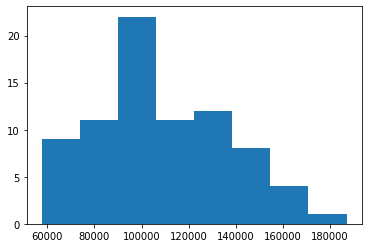

In [102]:
#Use matplotlib para dibujar un histograma de datos salariales
plt.hist(df['salary'],bins=8)

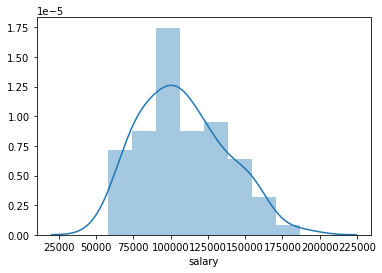

In [103]:
#Use el paquete marino para dibujar un histograma
sns.distplot(df['salary']);

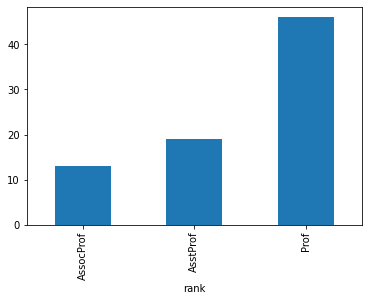

In [104]:
# Utilice la función matplotlib normal para mostrar un diagrama de barras
df.groupby(['rank'])['salary'].count().plot(kind='bar')

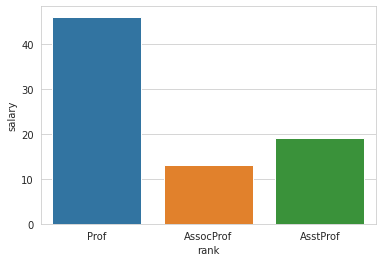

In [105]:
#Usa el paquete seaborn para mostrar una gráfica de barras.
sns.set_style("whitegrid")

ax = sns.barplot(x='rank',y ='salary', data=df, estimator=len)

In [0]:
# Dividido en 2 grupos:
ax = sns.barplot(x='rank',y ='salary', hue='sex', data=df, estimator=len)

In [0]:
#Violinplot
sns.violinplot(x = "salary", data=df)

In [0]:
#Scatterplot en seaborn
sns.jointplot(x='service', y='salary', data=df)

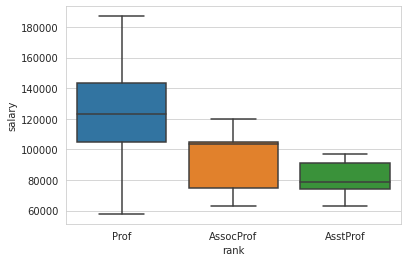

In [106]:
# box plot
sns.boxplot(x='rank',y='salary', data=df)

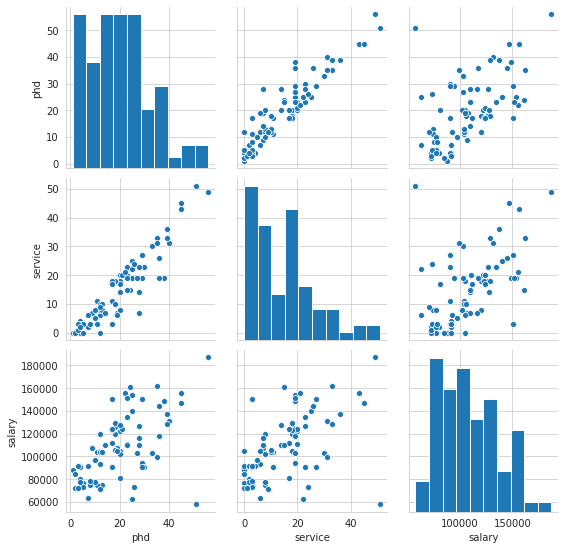

In [110]:
# Pairplot 
sns.pairplot(df)